# Transfer Learning Inception V3 using Keras
Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
pwd

'C:\\Users\\harsh\\Documents\\Cotton'

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [17]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [18]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [19]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 61 steps, validate for 1 steps
Epoch 1/20
61/61 [==============================] - 110s 2s/step - loss: 0.6525 - accuracy: 0.8350 - val_loss: 5.4874 - val_accuracy: 0.7222
Epoch 2/20
61/61 [==============================] - 112s 2s/step - loss: 0.7512 - accuracy: 0.8447 - val_loss: 3.3898 - val_accuracy: 0.6667
Epoch 3/20
61/61 [==============================] - 113s 2s/step - loss: 0.5516 - accuracy: 0.8826 - val_loss: 3.6545 - val_accuracy: 0.6667
Epoch 4/20
61/61 [==============================] - 115s 2s/step - loss: 0.4693 - accuracy: 0.9042 - val_loss: 5.4924 - val_accuracy: 0.7222
Epoch 5/20
61/61 [==============================] - 116s 2s/step - loss: 0.4447 - accuracy: 0.9077 - val_loss: 4.6589 - val_accuracy: 0.6667
Epoch 6/20
61/61 [==============================] - 116s 2s/step - loss: 0.6322 - accuracy: 0.8826 - val_loss: 7.6189 - val_accuracy: 0.5556
Epoch 7/20
61/61 [==============================] - 116s 2s/ste

In [20]:
import matplotlib.pyplot as plt

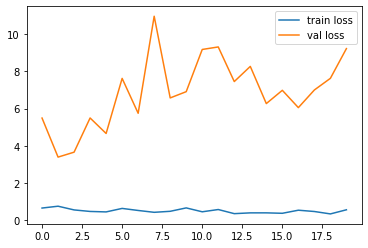

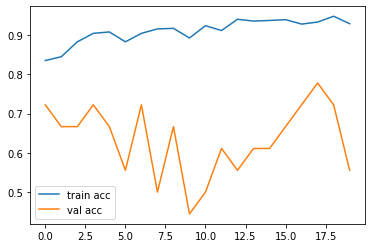

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [23]:
y_pred = model.predict(test_set)

In [24]:
y_pred

array([[7.75064902e-22, 8.12200233e-06, 9.89697516e-01, 1.02943815e-02],
       [0.00000000e+00, 1.00000000e+00, 5.05501661e-29, 1.70250534e-22],
       [0.00000000e+00, 1.00000000e+00, 5.17450229e-27, 2.02299429e-22],
       [4.02370248e-10, 1.84032306e-01, 8.00459743e-01, 1.55080007e-02],
       [8.11500401e-35, 9.98492002e-01, 1.06671729e-08, 1.50793733e-03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.51122683e-38],
       [1.83323848e-26, 9.99995232e-01, 2.09843837e-10, 4.80561857e-06],
       [1.14243483e-23, 3.00743967e-13, 1.46301613e-06, 9.99998569e-01],
       [9.05062824e-32, 1.00000000e+00, 7.74046422e-14, 5.35388366e-11],
       [3.20130405e-25, 9.98201489e-01, 1.79843302e-03, 2.44618290e-13],
       [2.62162497e-33, 9.99993443e-01, 4.52885570e-06, 2.06971345e-06],
       [1.33745437e-18, 1.21730978e-12, 9.99990344e-01, 9.69371104e-06],
       [7.30820472e-32, 4.40278964e-16, 1.00000000e+00, 1.48370358e-10],
       [1.04474019e-26, 5.35667932e-04, 1.91670415e

In [25]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [26]:
y_pred

array([2, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 2, 2, 3, 3, 1, 1, 3], dtype=int64)

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
model=load_model('model_resnet50.h5')

OSError: SavedModel file does not exist at: model_resnet50.h5/{saved_model.pbtxt|saved_model.pb}